In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import math as math
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import dataframe_image as dfi

ImportError: cannot import name 'contextfilter' from 'jinja2' (c:\ProgramData\Anaconda3\lib\site-packages\jinja2\__init__.py)

In [3]:
#Get the Dataset
df=pd.read_csv('./data/Stock_Price_BRL 2016-2021.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Close_Stock(EUR),Close_EUR,Close_Stock(BRL)
Date,,,
2016-01-04,70.580002,4.2891,302.724687
2016-01-05,71.430000,4.3710,312.220530
2016-01-06,72.050003,4.3301,311.983718
2016-01-07,71.339996,4.3322,309.059131
2016-01-08,71.050003,4.4145,313.650238


In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)

Dataframe Shape:  (1519, 3)


<AxesSubplot:xlabel='Date'>

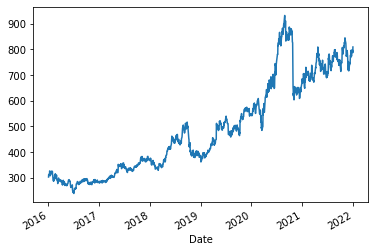

In [5]:
#Plot Adjusted Close Price
df['Close_Stock(BRL)'].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df['Close_Stock(BRL)'])

#Selecting the Features
features = ['Close_Stock(EUR)','Close_EUR']

In [7]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)


feature_transform.head()

dfi.export(feature_transform.head(), './data/df_normalizado.png')

NameError: name 'dfi' is not defined

In [8]:
#Splitting to Training set and Test set
X_train = feature_transform['2016-01-01':'2019-12-31']

X_test = feature_transform['2020']

Y_train = df['2016-01-01':'2019-12-31']
Y_train = Y_train['Close_Stock(BRL)']

Y_test = df['2020']
Y_test = Y_test['Close_Stock(BRL)']

C:\Users\I514609\AppData\Local\Temp/ipykernel_31408/3592796502.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = feature_transform['2020']
C:\Users\I514609\AppData\Local\Temp/ipykernel_31408/3592796502.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Y_test = df['2020']


In [ ]:
#Splitting to Training set and Test set (Ratio: 80:20)
# timesplit= TimeSeriesSplit(n_splits=20)
# for train_index, test_index in timesplit.split(feature_transform):
#        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
#        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
#X_train.shape é o maior (80%)
print(X_train.head())
print(X_train.shape)

# X_Test é o menor (20%)
print(X_test.head())
print(X_test.shape)

print(Y_train.head())

print(Y_test.head())

            Close_Stock(EUR)  Close_EUR
Date                                   
2016-01-04          0.073423   0.284297
2016-01-05          0.084411   0.306251
2016-01-06          0.092425   0.295288
2016-01-07          0.083247   0.295851
2016-01-08          0.079498   0.317911
(1010, 2)
            Close_Stock(EUR)  Close_EUR
Date                                   
2020-01-02          0.738108   0.337694
2020-01-03          0.718201   0.338685
2020-01-06          0.706567   0.349890
2020-01-07          0.713547   0.352463
2020-01-08          0.722854   0.349461
(254, 2)
Date
2016-01-04    302.724687
2016-01-05    312.220530
2016-01-06    311.983718
2016-01-07    309.059131
2016-01-08    313.650238
Name: Close_Stock(BRL), dtype: float64
Date
2020-01-02    547.572600
2020-01-03    541.106316
2020-01-06    542.061119
2020-01-07    545.662331
2020-01-08    547.580404
Name: Close_Stock(BRL), dtype: float64


In [10]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
trainY =np.array(Y_train)
testY =np.array(Y_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

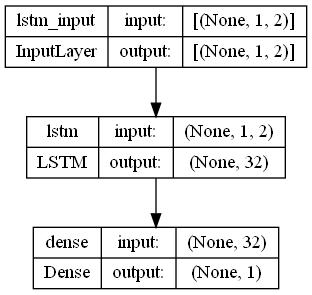

In [11]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, to_file='./images/LSTM_Diagram.png', show_shapes=True, show_layer_names=True)

In [12]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 1s 2ms/step


In [13]:
#Model Training
history=lstm.fit(X_train, trainY, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
127/127 [==============================] - 3s 3ms/step - loss: 147545.4844
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 146068.2344
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 143356.6406
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 139828.1094
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 136023.7500
Epoch 6/200
127/127 [==============================] - 0s 2ms/step - loss: 132251.1562
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 128636.8984
Epoch 8/200
127/127 [==============================] - 0s 2ms/step - loss: 125218.4062
Epoch 9/200
127/127 [==============================] - 0s 2ms/step - loss: 121995.3125
Epoch 10/200
127/127 [==============================] - 0s 2ms/step - loss: 118953.1562
Epoch 11/200
127/127 [==============================] - 0s 2ms/step - loss: 116073.2109
Epoch 12/200
127/127 [===================

In [14]:
print(testY.shape)
print(y_pred.shape)
final_df = pd.DataFrame(feature_transform['2020'])
final_df['True_Value'] = testY
final_df['Predicted_Value'] = y_pred
final_df.head()

(254,)
(254, 1)


C:\Users\I514609\AppData\Local\Temp/ipykernel_31408/289931347.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  final_df = pd.DataFrame(feature_transform['2020'])


,Close_Stock(EUR),Close_EUR,True_Value,Predicted_Value
Date,,,,
2020-01-02,0.738108,0.337694,547.572600,-0.031320
2020-01-03,0.718201,0.338685,541.106316,-0.030349
2020-01-06,0.706567,0.349890,542.061119,-0.029583
2020-01-07,0.713547,0.352463,545.662331,-0.029867
2020-01-08,0.722854,0.349461,547.580404,-0.030367


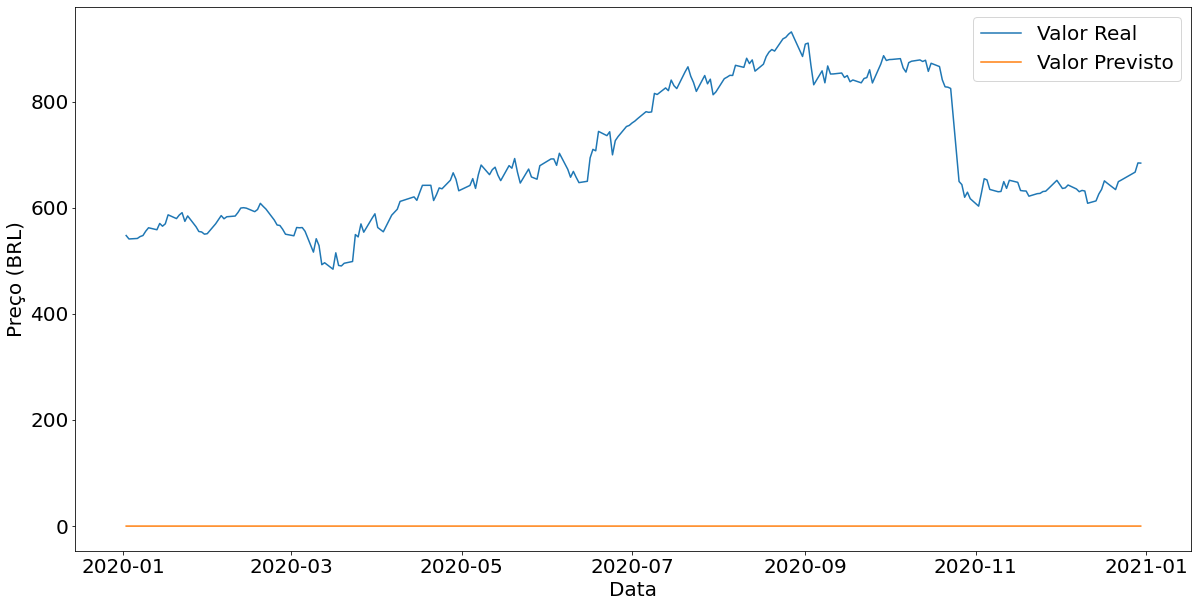

In [15]:
plt.figure(figsize = (20,10))
plt.rcParams['font.size'] = '20'
plt.plot(final_df['True_Value'], label='Valor Real')
plt.plot(final_df['Predicted_Value'], label='Valor Previsto')
plt.title("")
plt.xlabel('Data')
plt.ylabel('Preço (BRL)')
plt.legend()
plt.savefig('./images/LSTM_Prediction.png')
plt.show()

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
mse = mean_squared_error(testY, y_pred)
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(testY, y_pred)
r2 = r2_score(testY, y_pred)


print(mse)
print(rmse)
print(mape)
print(r2)

496792.71635493037
704.8352405739446
100.0032720504342
-32.294376976187976


In [18]:
# Get Subset by month
df_january = final_df[final_df.index.month == 1]
df_february = final_df[final_df.index.month == 2]
df_march = final_df[final_df.index.month == 3]
df_april = final_df[final_df.index.month == 4]
df_may = final_df[final_df.index.month == 5]
df_june = final_df[final_df.index.month == 6]
df_july = final_df[final_df.index.month == 7]
df_august = final_df[final_df.index.month == 8]
df_september = final_df[final_df.index.month == 9]
df_october = final_df[final_df.index.month == 10]
df_november = final_df[final_df.index.month == 11]
df_december = final_df[final_df.index.month == 12]

In [19]:
# Print max values by each month
print(df_january[df_january['Predicted_Value']==df_january['Predicted_Value'].max()])
print(df_february[df_february['Predicted_Value']==df_february['Predicted_Value'].max()])
print(df_march[df_march['Predicted_Value']==df_march['Predicted_Value'].max()])
print(df_april[df_april['Predicted_Value']==df_april['Predicted_Value'].max()])
print(df_may[df_may['Predicted_Value']==df_may['Predicted_Value'].max()])
print(df_june[df_june['Predicted_Value']==df_june['Predicted_Value'].max()])
print(df_july[df_july['Predicted_Value']==df_july['Predicted_Value'].max()])
print(df_august[df_august['Predicted_Value']==df_august['Predicted_Value'].max()])
print(df_september[df_september['Predicted_Value']==df_september['Predicted_Value'].max()])
print(df_october[df_october['Predicted_Value']==df_october['Predicted_Value'].max()])
print(df_november[df_november['Predicted_Value']==df_november['Predicted_Value'].max()])
print(df_december[df_december['Predicted_Value']==df_december['Predicted_Value'].max()])

            Close_Stock(EUR)  Close_EUR  True_Value  Predicted_Value
Date                                                                
2020-08-27           0.97544   0.913231  931.344751       820.089355
            Close_Stock(EUR)  Close_EUR  True_Value  Predicted_Value
Date                                                                
2020-09-02          0.990176    0.85895   910.25535       806.833496
            Close_Stock(EUR)  Close_EUR  True_Value  Predicted_Value
Date                                                                
2020-10-05          0.872544    0.91819   880.97632       788.912476
            Close_Stock(EUR)  Close_EUR  True_Value  Predicted_Value
Date                                                                
2020-11-04          0.411711   0.948292   654.62985       650.760986
            Close_Stock(EUR)  Close_EUR  True_Value  Predicted_Value
Date                                                                
2020-12-29          0.541624   0.8